## Diabet Machin Learning Project
# 1404 - 1

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
data = pd.read_csv('diabetes.csv')
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [61]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [62]:
data.shape

(768, 9)

Text(0.5, 1.0, 'Diabetes Outcome Distribution')

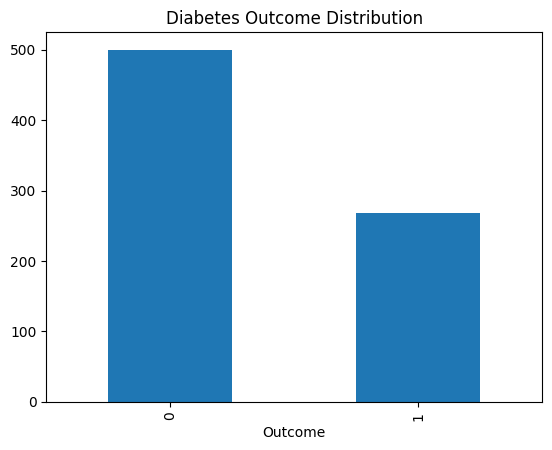

In [63]:
data['Outcome'].value_counts().plot(kind='bar')
plt.title('Diabetes Outcome Distribution')

In [64]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [65]:
x = np.array(x)
y = np.array(y)

In [66]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [67]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2, 
                                                    random_state=7)


In [68]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [69]:
# import models

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)


,priors,None
,var_smoothing,1e-09


In [70]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)


In [71]:
# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')


Training Accuracy: 0.760586319218241
Testing Accuracy: 0.7532467532467533


In [72]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix:')
print(cm)

# classification report
cr = classification_report(y_test, y_pred_test)
print('Classification Report:')
print(cr)


Confusion Matrix:
[[78 19]
 [19 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        97
           1       0.67      0.67      0.67        57

    accuracy                           0.75       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.75      0.75      0.75       154



<Axes: >

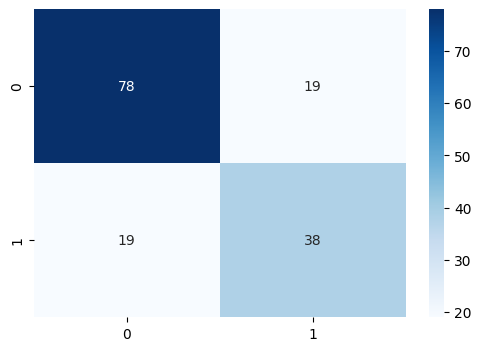

In [73]:
# plot confusion matrix
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


In [74]:
# save the model

import joblib
joblib.dump(model, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [75]:
import joblib
loaded_model = joblib.load('diabetes_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Example prediction
sample_data = np.array([[6,148,72,35,0,33.6,0.627,50]])
sample_data_scaled = loaded_scaler.transform(sample_data)
prediction = loaded_model.predict(sample_data_scaled)
print(f'Predicted Outcome: {prediction[0]}')  # 0: No Diabetes, 1: Diabetes

Predicted Outcome: 1


## KNN

In [76]:
from sklearn.neighbors import KNeighborsClassifier

Text(0.5, 0, 'Number of Neighbors K')

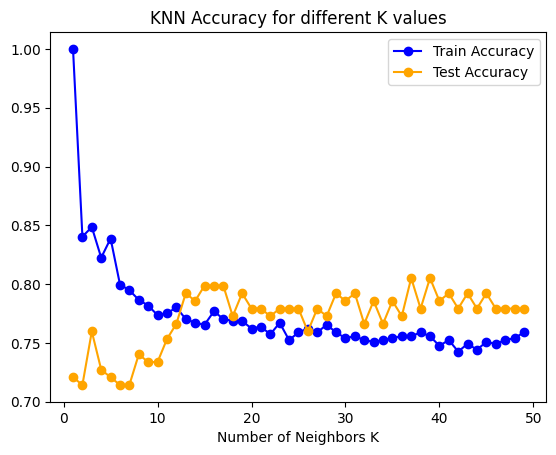

In [77]:
acc_train = []
acc_test = []

for k in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_train = knn.predict(x_train)
    knn_accuracy_train = accuracy_score(y_train, y_pred_train)
    acc_train.append(knn_accuracy_train)
    y_pred_test = knn.predict(x_test)
    knn_accuracy_test = accuracy_score(y_test, y_pred_test)
    acc_test.append(knn_accuracy_test)
    # print(f'KNN Train Accuracy k={k}: {knn_accuracy_train}')
    # print(f'KNN Test Accuracy k={k}: {knn_accuracy_test}')

plt.plot(range(1,50), acc_train, label='Train Accuracy', color='blue', marker='o')
plt.plot(range(1,50), acc_test, label='Test Accuracy', color='orange', marker='o')
plt.legend()
plt.title('KNN Accuracy for different K values')
plt.xlabel('Number of Neighbors K')

## Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

Text(0.5, 0, 'Number of Max Depth K')

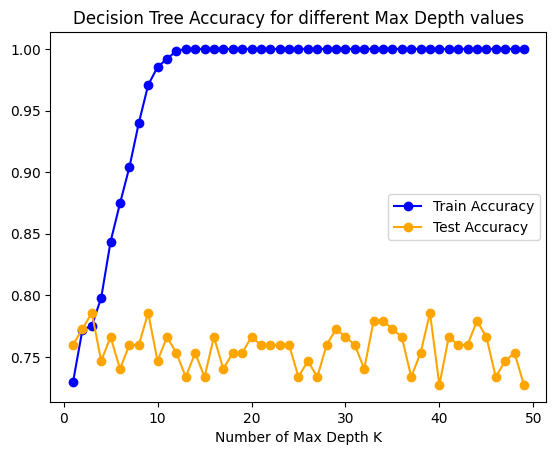

In [79]:
acc_train = []
acc_test = []

for k in range(1, 50):
    dTree = DecisionTreeClassifier(max_depth=k)
    dTree.fit(x_train, y_train)
    y_pred_train = dTree.predict(x_train)
    dTree_accuracy_train = accuracy_score(y_train, y_pred_train)
    acc_train.append(dTree_accuracy_train)
    y_pred_test = dTree.predict(x_test)
    dTree_accuracy_test = accuracy_score(y_test, y_pred_test)
    acc_test.append(dTree_accuracy_test)
    # print(f'DesicionTree Train Accuracy max_depth={k}: {dTree_accuracy_train}')
    # print(f'DesicionTree Test Accuracy max_depth={k}: {dTree_accuracy_test}')

plt.plot(range(1,50), acc_train, label='Train Accuracy', color='blue', marker='o')
plt.plot(range(1,50), acc_test, label='Test Accuracy', color='orange', marker='o')
plt.legend()
plt.title('Decision Tree Accuracy for different Max Depth values')
plt.xlabel('Number of Max Depth K')


## Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier

Text(0.5, 0, 'Number of Estimators K')

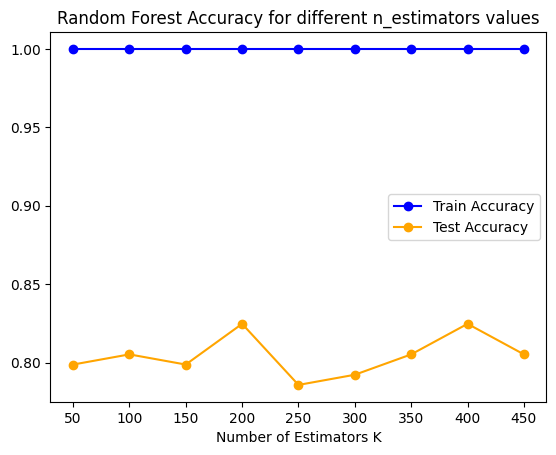

In [81]:
acc_train = []
acc_test = []

for k in range(50, 500, 50):
    svc = RandomForestClassifier(n_estimators=k)
    svc.fit(x_train, y_train)
    y_pred_train = svc.predict(x_train)
    svc_accuracy_train = accuracy_score(y_train, y_pred_train)
    acc_train.append(svc_accuracy_train)
    y_pred_test = svc.predict(x_test)
    randomForest_accuracy_test = accuracy_score(y_test, y_pred_test)
    acc_test.append(randomForest_accuracy_test)
    # print(f'Random Forest Train Accuracy n_estimators={k}: {randomForest_accuracy_train}')
    # print(f'Random Forest Test Accuracy n_estimators={k}: {randomForest_accuracy_test}')

plt.plot(range(50, 500, 50), acc_train, label='Train Accuracy', color='blue', marker='o')
plt.plot(range(50, 500, 50), acc_test, label='Test Accuracy', color='orange', marker='o')
plt.legend()
plt.title('Random Forest Accuracy for different n_estimators values')
plt.xlabel('Number of Estimators K')


## SVM

In [82]:
from sklearn.svm import SVC

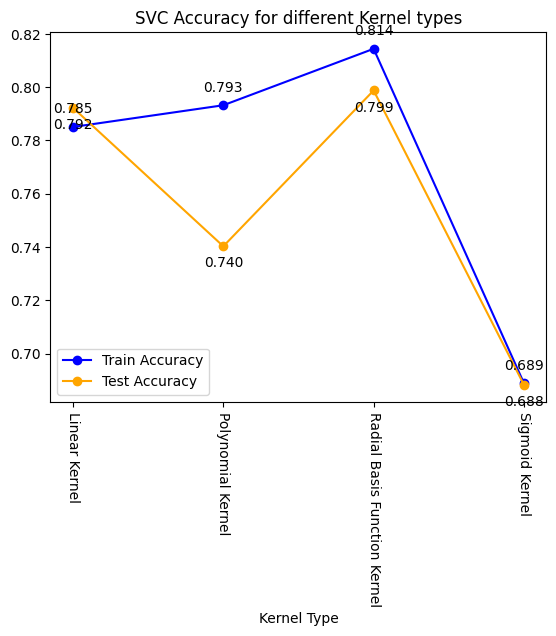

In [83]:
dictKernels = {
    'linear': 'Linear Kernel',
    'poly': 'Polynomial Kernel',
    'rbf': 'Radial Basis Function Kernel',
    'sigmoid': 'Sigmoid Kernel'
}

acc_train = []
acc_test = []

for kernel in dictKernels.items():
    svc = SVC(kernel=kernel[0])
    svc.fit(x_train, y_train)
    y_pred_train = svc.predict(x_train)
    svc_accuracy_train = accuracy_score(y_train, y_pred_train)
    acc_train.append(svc_accuracy_train)
    y_pred_test = svc.predict(x_test)
    svc_accuracy_test = accuracy_score(y_test, y_pred_test)
    acc_test.append(svc_accuracy_test)
    # print(f'SVC ({dictKernels[kernel[0]]}) Train Accuracy: {svc_accuracy_train}')
    # print(f'SVC ({dictKernels[kernel[0]]}) Test Accuracy: {svc_accuracy_test}')
    
plt.plot(list(dictKernels.values()), acc_train, label='Train Accuracy', color='blue', marker='o')
plt.plot(list(dictKernels.values()), acc_test, label='Test Accuracy', color='orange', marker='o')

# Annotate train accuracy
for i, val in enumerate(acc_train):
    plt.annotate(f'{val:.3f}', xy=(i, val), xytext=(0, 10), textcoords='offset points', ha='center')

# Annotate test accuracy
for i, val in enumerate(acc_test):
    plt.annotate(f'{val:.3f}', xy=(i, val), xytext=(0, -15), textcoords='offset points', ha='center')

plt.legend()
plt.title('SVC Accuracy for different Kernel types')
plt.xlabel('Kernel Type')
plt.xticks(rotation=-90)
plt.show()

## MLP

In [84]:
from sklearn.neural_network import MLPClassifier

Text(0.5, 0, 'Number of Neurons in Hidden Layer')

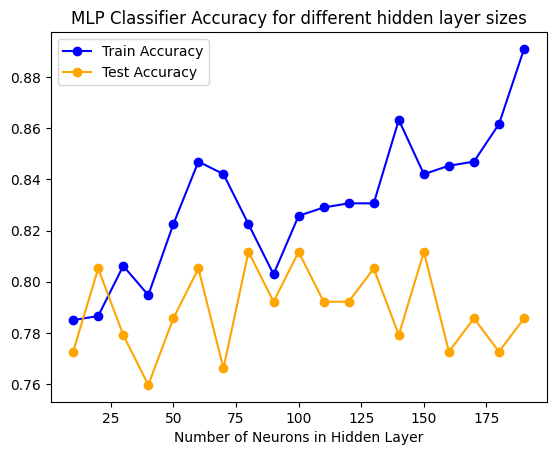

In [85]:
acc_train = []
acc_test = []
for k in range(10, 200, 10):
    mlp = MLPClassifier(hidden_layer_sizes=(k,), max_iter=1000)
    mlp.fit(x_train, y_train)
    y_pred_train = mlp.predict(x_train)
    mlp_accuracy_train = accuracy_score(y_train, y_pred_train)
    acc_train.append(mlp_accuracy_train)
    y_pred_test = mlp.predict(x_test)
    mlp_accuracy_test = accuracy_score(y_test, y_pred_test)
    acc_test.append(mlp_accuracy_test)
    # print(f'MLP Train Accuracy hidden_layer_sizes={k}: {mlp_accuracy_train}')
    # print(f'MLP Test Accuracy hidden_layer_sizes={k}: {mlp_accuracy_test}')
    
plt.plot(range(10, 200, 10), acc_train, label='Train Accuracy', color='blue', marker='o')
plt.plot(range(10, 200, 10), acc_test, label='Test Accuracy', color='orange', marker='o')
plt.legend()
plt.title('MLP Classifier Accuracy for different hidden layer sizes')
plt.xlabel('Number of Neurons in Hidden Layer')

## Gradient Boost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

Text(0.5, 0, 'Number of Estimators K')

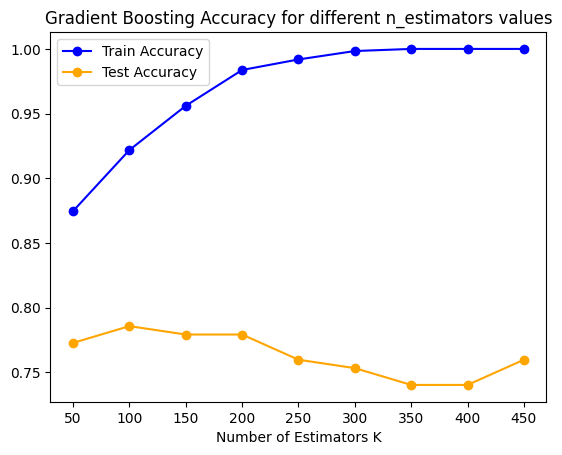

In [87]:
acc_train = []
acc_test = []
for k in range(50, 500, 50):
    gboost = GradientBoostingClassifier(n_estimators=k)
    gboost.fit(x_train, y_train)
    y_pred_train = gboost.predict(x_train)
    gboost_accuracy_train = accuracy_score(y_train, y_pred_train)
    acc_train.append(gboost_accuracy_train)
    y_pred_test = gboost.predict(x_test)
    gboost_accuracy_test = accuracy_score(y_test, y_pred_test)
    acc_test.append(gboost_accuracy_test)
    # print(f'GBoost Train Accuracy n_estimators={k}: {gboost_accuracy_train}')
    # print(f'GBoost Test Accuracy n_estimators={k}: {gboost_accuracy_test}')
plt.plot(range(50, 500, 50), acc_train, label='Train Accuracy', color='blue', marker='o')
plt.plot(range(50, 500, 50), acc_test, label='Test Accuracy', color='orange', marker='o')
plt.legend()
plt.title('Gradient Boosting Accuracy for different n_estimators values')   
plt.xlabel('Number of Estimators K')

## Cross-validation

In [93]:
from sklearn.model_selection import cross_val_score

In [95]:
# Cross-validation for Decision Tree
dt = DecisionTreeClassifier(max_depth=5)
cv_scores = cross_val_score(dt, x, y, cv=5, scoring='accuracy')
print('CV Scores:', cv_scores)
print(f'Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})')

CV Scores: [0.73376623 0.68831169 0.75324675 0.79084967 0.77124183]
Mean CV Accuracy: 0.7475 (+/- 0.0351)


## Grid Search for Hyperparameter Tuning

In [97]:
from sklearn.model_selection import GridSearchCV

In [98]:
# Grid Search for Decision Tree hyperparameters
param_grid = {
    'max_depth': [3, 5, 7, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best CV Accuracy: {grid_search.best_score_:.4f}')

# Evaluate the best model
best_dt = grid_search.best_estimator_
y_pred = best_dt.predict(x_test)
print(f'Test Accuracy: {accuracy_score(y_test, y_pred):.4f}')

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best CV Accuracy: 0.7296
Test Accuracy: 0.7857


In [100]:
# Grid Search for MLP hyperparameters

param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (100,50)],
    'activation': ['relu', 'tanh'],
    'learning_rate_init': [1e-3, 1e-2]
}

mlp = MLPClassifier(max_iter=1000, random_state=7)
grid_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='accuracy', n_jobs=-1)
grid_mlp.fit(x_train, y_train)

print(f'Best Parameters: {grid_mlp.best_params_}')
print(f'Best CV Accuracy: {grid_mlp.best_score_:.4f}')

best_mlp = grid_mlp.best_estimator_
y_pred = best_mlp.predict(x_test)
print(f'Test Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Best Parameters: {'activation': 'tanh', 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}
Best CV Accuracy: 0.7312
Test Accuracy: 0.8182
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.87        97
           1       0.84      0.63      0.72        57

    accuracy                           0.82       154
   macro avg       0.82      0.78      0.79       154
weighted avg       0.82      0.82      0.81       154

Confusion Matrix:
[[90  7]
 [21 36]]
